**Import Library**

In [18]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

**Load Data**

In [2]:
train_data = pd.read_csv('03-train.csv')
test_data = pd.read_csv('04-test.csv')

In [3]:
X_train = train_data.drop('Exited', axis=1)
y_train = train_data['Exited']
X_test = test_data.drop('Exited', axis=1)
y_test = test_data['Exited']

**Building Model**

In [4]:
clf = xgb.XGBClassifier(
    tree_method = 'hist',
    random_state=42
)

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200],
    'scale_pos_weight': [3, 4, 5]
}

grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1
)

In [5]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 200],
                         'scale_pos_weight': [3, 4, 5]},
             scoring='f1', verbose=1)

In [9]:
best_model = grid_search.best_estimator_

**Evalution**

In [14]:
"""

Classification Report

"""

y_probs = best_model.predict_proba(X_test)[:, 1]
y_pred_final = (y_probs >= 0.35).astype(int)
print(classification_report(y_test, y_pred_final, target_names=['Stayed', 'Exited']))

              precision    recall  f1-score   support

      Stayed       0.94      0.75      0.84      1593
      Exited       0.45      0.80      0.58       407

    accuracy                           0.76      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.76      0.78      2000



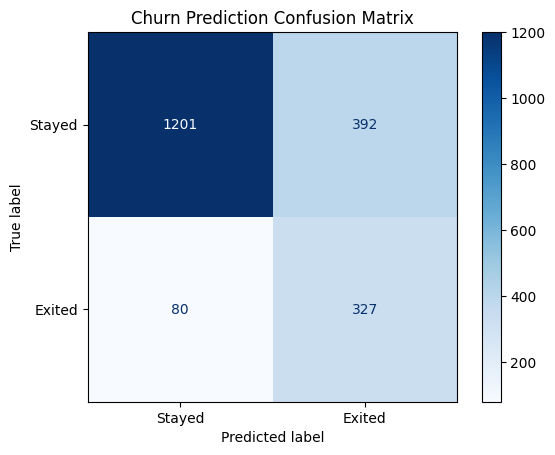

In [16]:
"""

Confusion Matrix

"""
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_final)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed', 'Exited'])
disp.plot(cmap='Blues')
plt.title('Churn Prediction Confusion Matrix')
plt.show()

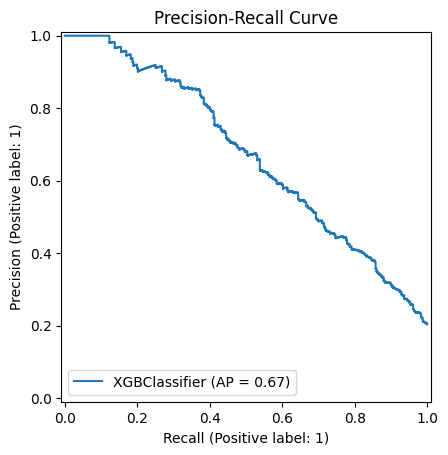

In [17]:
"""

Precision-Recall Curve

"""

from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

**Save Model**

In [19]:
joblib.dump(best_model, 'final_churn_model.joblib')
joblib.dump(list(X_train.columns), 'feature_names.joblib')

['feature_names.joblib']